In [44]:
# import libraries
import numpy as np
import pandas as pd
import plotly_express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# download and import dataset into the notebook
education_data = pd.read_csv('education.csv')

# load the data into dataframe and display the first five rows
education_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [46]:
def gender_to_number(g):
    if g == 'M':
        return 0
    elif g == 'F':
        return 1
    else:
        return np.nan

In [47]:
education_data['gender'] = education_data['gender'].apply(gender_to_number)

education_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [48]:
# data cleaning

# drop irrelevant columns
education_data.drop(['NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'], inplace=True, axis=1)
#rename row headers
education_data.columns = [column.lower() for column in education_data.columns]
# remove non-numerical values 
education_data.loc[:'raisedhands':] = education_data.loc[:'raisedhands':].apply(lambda x: pd.to_numeric(x, errors = 'coerce'))
# use fill_na to remove 'nan' values
education_data.fillna

education_data.head()

,gender,raisedhands,visitedresources
0,0,15,16
1,0,20,20
2,0,10,7
3,0,30,25
4,0,40,50


In [49]:
education_data.head()

,gender,raisedhands,visitedresources
0,0,15,16
1,0,20,20
2,0,10,7
3,0,30,25
4,0,40,50


In [50]:
# create a scatter plot
px.scatter(education_data, x='visitedresources', y='raisedhands', color = 'gender')

In [51]:
# extract data from the dataframe as a numpy array 
education_data.values

array([[ 0, 15, 16],
       [ 0, 20, 20],
       [ 0, 10,  7],
       ...,
       [ 1, 55, 74],
       [ 1, 30, 17],
       [ 1, 35, 14]])

<function matplotlib.pyplot.show(*args, **kw)>

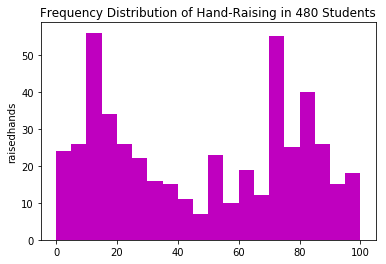

In [58]:
x = education_data.values
a = x[:,1] #extract 1 column
plt.hist(a, bins=20, color = 'm')
plt.title('Frequency Distribution of Hand-Raising in 480 Students')
plt.ylabel('raisedhands')
plt.show

## What I Did
First, I imported the Student Academic Performance dataset. I reduced and cleaned the dataset by deleting all but three columns, renaming the columns so that the cases matched, and ensuring there were no non-numbers in the set. I converted gender to a numerical value. Then, I plotted `visitedresources` against `raisedhands` on a scatterplot, indicating the gender of individuals based on the color of the plot. Finally, I extracted an nparray from the dataset and created a histogram of `raisedhands` in this sample. 

## What I Found
There appears to be a positive relationship between `visitedresources` and `raisedhands`. The distribution of this data is somewhat unusual. There is a cluster of students who did the majority of the readings and raised hands frequently and a cluster of students who did few readings and raised hands infrequently, with not much in between. This pattern, specifically with respect to hand-raising, is represented in the histogram.